## Linear Regression Using Tensorflow (Task 5a And Task 5b)

In [8]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
######################################## STEP 1: LOAD DATASETS ###############################################################
# Loading Dataset
boston = load_boston()
# Seperate Data into Features and Labels
# Features
features_df = pd.DataFrame(np.array(boston.data), columns=[boston.feature_names])
# Labels
labels_df = pd.DataFrame(np.array(boston.target), columns=['labels'])
#splitting data into training, testing and validation datasets
X_train = features_df[:300]
X_val = features_df[301:401]
X_test=features_df[402:]

y_train = labels_df[:300]
y_val = labels_df[301:401]
y_test=labels_df[402:]

m, n = X_train.shape
m1, n1 = X_test.shape
m2, n2 = X_val.shape

######################################## STEP 2: PREPROCESSING DATA #########################################################
# scaling and normalizing data values
scaler = StandardScaler()
scaled_housing_data = scaler.fit_transform(X_train)
scaled_housing_data_plus_bias = np.c_[np.ones((m, 1)), scaled_housing_data]

scaled_housing_data1 = scaler.fit_transform(X_test)
scaled_housing_data_plus_bias1 = np.c_[np.ones((m1, 1)), scaled_housing_data1]

scaled_housing_data2 = scaler.fit_transform(X_val)
scaled_housing_data_plus_bias2 = np.c_[np.ones((m2, 1)), scaled_housing_data2]

#converting to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

X_val = np.array(X_val)
y_val = np.array(y_val)

print('Training:', X_train.shape)
print('Validation:',X_val.shape)
print('Testing:',X_test.shape)

Training: (300, 13)
Validation: (100, 13)
Testing: (104, 13)


## Computing Gradient Using tf.gradients() (Task 5c) 

In [9]:
################################ STEP 3: INITIALIZE VARIABLES AND CONSTANT ###################################################

#decalaring number of epochs and learning rate
n_epochs = 1000
learning_rate = 0.1

#declaring constants for training, testing and validation dataset into tensors
X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
XTEST = tf.constant(scaled_housing_data_plus_bias1, dtype=tf.float32, name="XTEST")
XVAL = tf.constant(scaled_housing_data_plus_bias2, dtype=tf.float32, name="XVAL")
y = tf.constant(y_train.reshape(-1, 1), dtype=tf.float32, name="y")
#declaring variables for weights
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
#finding the loss
error = y_pred - y
#computing mean square error ℓ(𝑤) =1/2𝑁 (Summation of [𝑡(i) − 𝑦(𝑥(i))]^2)
mse = (tf.reduce_mean(tf.square(error), name="mse"))/2

################################ STEP 4: COMPUTE GRADIENTS AND UPDATE WEIGHTS #################################################
#tf.gradients: returns the gradient of mse(i.e loss) w.r.t theta (i.e weights)
gradients = tf.gradients(mse, [theta])[0]
#calculate the new weights using w - lr * gradients
# use to update the weights by explicitly running training_op in session
training_op = tf.assign(theta, theta - learning_rate * gradients)
#initializing all variables
init = tf.global_variables_initializer()
############################################## STEP 5: RUN THE SESSION #########################################################
with tf.Session() as sess:
    sess.run(init)
    print('Training Dataset:')
    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print('Epoch: {0}, Loss: {1}'.format(epoch, mse.eval()))
        #updating the weights    
        sess.run(training_op)
    
    result=sess.run(y_pred)
    best_theta = theta.eval()
############################################## STEP 6: PRINT LOSS #############################################################   
    # Predicted Labels
    y_predT = sess.run(tf.matmul(X, best_theta))
    # Mean Squared Error for training
    mse2 = sess.run((tf.reduce_mean(tf.square(y_predT - y_train))/2))
    print('Cost for Training Dataset: ',mse2)
    
    # Predicted Labels
    y_pred2 = sess.run(tf.matmul(XVAL, best_theta))
    # Mean Squared Error for Validation 
    mse1 = sess.run((tf.reduce_mean(tf.square(y_pred2 - y_val))/2))
    print('Cost for Validation Dataset: ',mse1)
    
    # Predicted Labels
    y_pred1 = sess.run(tf.matmul(XTEST, best_theta))
    # Mean Squared Error for Testing
    mse = sess.run((tf.reduce_mean(tf.square(y_pred1 - y_test))/2))
    print('Cost for Testing Dataset: ',mse)


Training Dataset:
Epoch: 0, Loss: 347.9875183105469
Epoch: 100, Loss: 4.8567681312561035
Epoch: 200, Loss: 4.818390846252441
Epoch: 300, Loss: 4.817009925842285
Epoch: 400, Loss: 4.8169426918029785
Epoch: 500, Loss: 4.816937446594238
Epoch: 600, Loss: 4.816936492919922
Epoch: 700, Loss: 4.81693696975708
Epoch: 800, Loss: 4.816936016082764
Epoch: 900, Loss: 4.816937446594238
Cost for Training Dataset:  4.81693741944465
Cost for Validation Dataset:  60.73483817550788
Cost for Testing Dataset:  64.83250331265052


## Computing Gradient Using tf.train.GradientDescentOptimizer (Task 6)

In [10]:
################################ STEP 1: INITIALIZE VARIABLES AND CONSTANT ###################################################
lr = 0.1
epochs = 1000
# for Training datasets (X)
X = tf.placeholder(tf.float32,[None,X_train.shape[1]])
# for training labels (y)
y = tf.placeholder(tf.float32,[None,1])
# Weights
W = tf.Variable(tf.ones([13,1]))
# bias
b = tf.Variable(tf.ones(X_train.shape[1]))
#initializing all variables
init = tf.global_variables_initializer()
################################ STEP 2: COMPUTE LOSS AND OPTIMIZATION ###################################################
# Predictions
y_hat = tf.add(tf.matmul(X, W), b)
# Cost Function mean square error ℓ(𝑤) =1/2𝑁 (Summation of [𝑡(i) − 𝑦(𝑥(i))]^2)
cost = (tf.reduce_mean(tf.square(y - y_hat)))/2
#optimizing gradients using tf.train.GradientDescentOptimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(cost)

######################################### STEP 3: RUN THE SESSION #########################################################
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(0,epochs):
        #feed the scaled and normalized training data and labels
        result, err = sess.run([optimizer, cost], feed_dict={X: scaled_housing_data, y: y_train})
        
        if epoch%100 == 0:
            print('Epoch: {0}, Loss: {1}'.format(epoch, err))
    
    print('Epoch: {0}, Error: {1}'.format(epoch+1, err))
######################################### STEP 3: PRINT LOSS ######################################################### 
    # Predicted Labels
    y_pred2 = sess.run(y_hat, feed_dict={X: scaled_housing_data})
    # Mean Squared Error for Training dataset
    mse = sess.run((tf.reduce_mean(tf.square(y_pred2 - y_train))/2))
    print('Cost for Training Dataset: ',mse)
    
    # Predicted Labels
    y_pred1 = sess.run(y_hat, feed_dict={X: scaled_housing_data2})
    # Mean Squared Error for Validation dataset
    mse1 = sess.run((tf.reduce_mean(tf.square(y_pred1 - y_val))/2))
    print('Cost for Validation Dataset: ',mse1)
    
    # Predicted Labels
    y_pred = sess.run(y_hat, feed_dict={X: scaled_housing_data1})
    # Mean Squared Error for Testing dataset
    mse2 = sess.run((tf.reduce_mean(tf.square(y_pred - y_test))/2))
    print('Cost for Testing Dataset: ',mse2)
    #mse = sess.run(cost)
    

Epoch: 0, Loss: 354.1891784667969
Epoch: 100, Loss: 68.84461975097656
Epoch: 200, Loss: 18.475011825561523
Epoch: 300, Loss: 7.731686115264893
Epoch: 400, Loss: 5.439036846160889
Epoch: 500, Loss: 4.949714183807373
Epoch: 600, Loss: 4.845272541046143
Epoch: 700, Loss: 4.82298469543457
Epoch: 800, Loss: 4.818230152130127
Epoch: 900, Loss: 4.8172149658203125
Epoch: 1000, Error: 4.817000865936279
Cost for Training Dataset:  4.8169960649013515
Cost for Validation Dataset:  60.682935177414464
Cost for Testing Dataset:  64.72879721347705


## Computing Gradient Using Scikit-learn library (Task 7)

Cost for Training Dataset:  4.816937010269552
Cost for Validation Dataset:  60.734849219572176
Cost for Testing Dataset:  64.8325385073239


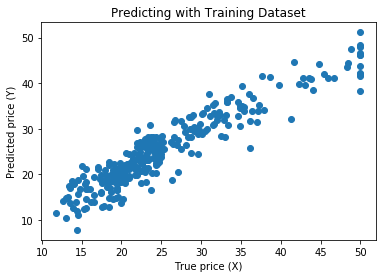

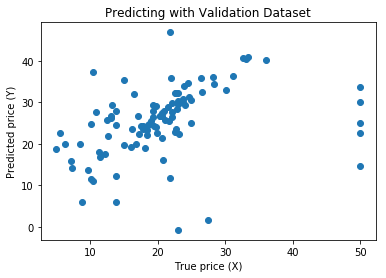

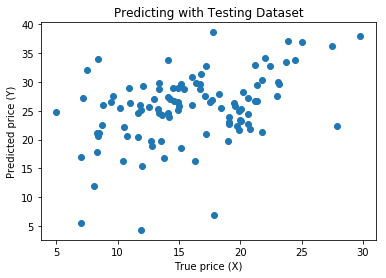

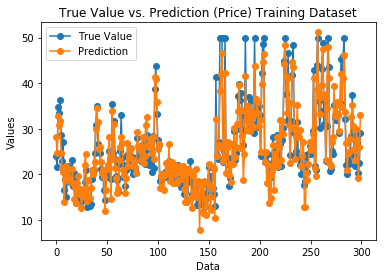

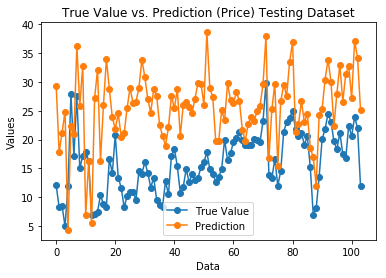

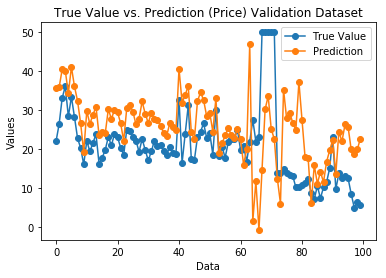

In [11]:
#Import scikit libraries
from sklearn.linear_model import LinearRegression
import sklearn
#################################### STEP 1: BUILD MODEL AND PREDICT #################################################### 
#creating linear regression object
lm = LinearRegression()
# building model using scaled and normalized training dataset 
lm.fit(scaled_housing_data, y_train)

#model prediction on Training dataset
Y_train_pred = lm.predict(scaled_housing_data)
#model prediction on Testing dataset
Y_pred = lm.predict(scaled_housing_data1)
#model prediction on Validation dataset
Y_pred1 = lm.predict(scaled_housing_data2)
######################################### STEP 2: COMPUTE LOSS ########################################################## 
#Computing mean square error loss 
mse_train = (sklearn.metrics.mean_squared_error(y_train, Y_train_pred))/2
mse_test = (sklearn.metrics.mean_squared_error(y_test, Y_pred))/2
mse_val = (sklearn.metrics.mean_squared_error(y_val, Y_pred1))/2
######################################### STEP 3: PRINT LOSS ############################################################# 
print('Cost for Training Dataset: ',mse_train)
print('Cost for Validation Dataset: ',mse_val)
print('Cost for Testing Dataset: ',mse_test)


########################################## STEP 3: PLOT REAL AND PREDICTED VALUES ########################################
#plotting predicted price values with price values of with Training dataset
plt.figure()
plt.scatter(y_train, Y_train_pred)
plt.axis('tight')
plt.xlabel('True price (X)')
plt.ylabel('Predicted price (Y)')
plt.title('Predicting with Training Dataset')

#plotting predicted price values with price values of Validation dataset
plt.figure()
plt.scatter(y_val, Y_pred1)
plt.axis('tight')
plt.xlabel('True price (X)')
plt.ylabel('Predicted price (Y)')
plt.title('Predicting with Validation Dataset')

#plotting predicted price values with price values of Testing dataset
plt.figure()
plt.scatter(y_test, Y_pred)
plt.axis('tight')
plt.xlabel('True price (X)')
plt.ylabel('Predicted price (Y)')
plt.title('Predicting with Testing Dataset')

#graph for comparing true and predicted values on testing dataset
predValues = Y_train_pred.ravel().tolist()
trueValues = y_train.ravel().tolist()
plt.figure()
plt.plot(trueValues, '-o', predValues, '-o')# ploting true and predicted values
plt.title('True Value vs. Prediction (Price) Training Dataset') #title of graph
plt.xlabel('Data')
plt.ylabel('Values')
plt.legend(['True Value', 'Prediction']) #indication labels

#graph for comparing true and predicted values on testing dataset
predValues = Y_pred.ravel().tolist()
trueValues = y_test.ravel().tolist()
plt.figure()
plt.plot(trueValues, '-o', predValues, '-o')# ploting true and predicted values
plt.title('True Value vs. Prediction (Price) Testing Dataset') #title of graph
plt.xlabel('Data')
plt.ylabel('Values')
plt.legend(['True Value', 'Prediction']) #indication labels

#graph for comparing true and predicted values on testing dataset
predValues = Y_pred1.ravel().tolist()
trueValues = y_val.ravel().tolist()
plt.figure()
plt.plot(trueValues, '-o', predValues, '-o')# ploting true and predicted values
plt.title('True Value vs. Prediction (Price) Validation Dataset') #title of graph
plt.xlabel('Data')
plt.ylabel('Values')
plt.legend(['True Value', 'Prediction']) #indication labels
